In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from matplotlib import pyplot as plt

fp_2020 = pd.read_csv(r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\2020_fantasy_points_halfPPR.csv')
ecr_2020 = pd.read_csv(r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\FantasyProsData\fantasypros\ecr\HALF_PPR_ECR.csv')

print(fp_2020)
print(ecr_2020)

            Player   Tm Pos   Age   G  GS  Half PPR FP       FP/G
0       A.J. Brown  TEN  WR  23.0  14  12        213.0  15.214286
1       A.J. Green  CIN  WR  32.0  16  14         87.5   5.468750
2    A.J. McCarron  HOU  QB  30.0   2   0          1.0   0.500000
3      Aaron Jones  GNB  RB  26.0  14  14        235.5  16.821429
4    Aaron Rodgers  GNB  QB  37.0  16  16        382.5  23.906250
..             ...  ...  ..   ...  ..  ..          ...        ...
559   Willie Snead  BAL  WR  28.0  13   8         77.5   5.961538
560      Zach Ertz  PHI  TE  30.0  11  11         60.0   5.454545
561    Zach Pascal  IND  WR  26.0  16  14        115.0   7.187500
562      Zack Moss  BUF  RB  23.0  13   0         95.0   7.307692
563      Zay Jones  LVR  WR  25.0  16   2         30.0   1.875000

[564 rows x 8 columns]
                  Player Team   Rank    Pos   Bye   Best  Worst    Avg  \
0         John Hightower  PHI  418.0  WR131   9.0  177.0  437.0  332.7   
1            Brett Maher   FA  289.0

In [29]:
fp_2020 = fp_2020.drop(columns=['Tm', 'Pos', 'Age', 'G', 'GS'])
ecr_2020 = ecr_2020.drop(columns=['Team', 'Pos', 'Bye', 'Std Dev'])

print(fp_2020)
print(ecr_2020)

            Player  Half PPR FP       FP/G
0       A.J. Brown        213.0  15.214286
1       A.J. Green         87.5   5.468750
2    A.J. McCarron          1.0   0.500000
3      Aaron Jones        235.5  16.821429
4    Aaron Rodgers        382.5  23.906250
..             ...          ...        ...
559   Willie Snead         77.5   5.961538
560      Zach Ertz         60.0   5.454545
561    Zach Pascal        115.0   7.187500
562      Zack Moss         95.0   7.307692
563      Zay Jones         30.0   1.875000

[564 rows x 3 columns]
                  Player   Rank   Best  Worst    Avg    ADP
0         John Hightower  418.0  177.0  437.0  332.7  382.0
1            Brett Maher  289.0  147.0  338.0  276.8  381.0
2          Devine Ozigbo  331.0  132.0  388.0  239.7  380.0
3          Corey Clement  356.0  149.0  469.0  318.1  379.0
4           Trent Taylor  366.0  168.0  500.0  310.7  378.0
..                   ...    ...    ...    ...    ...    ...
372       Michael Thomas    7.0    3.0  

In [30]:
merged = ecr_2020.merge(fp_2020)

print(merged)

                  Player   Rank   Best  Worst    Avg    ADP  Half PPR FP  \
0         John Hightower  418.0  177.0  437.0  332.7  382.0         24.0   
1          Devine Ozigbo  331.0  132.0  388.0  239.7  380.0          8.5   
2          Corey Clement  356.0  149.0  469.0  318.1  379.0         18.5   
3           Trent Taylor  366.0  168.0  500.0  310.7  378.0         14.0   
4          Adam Trautman  378.0  206.0  406.0  329.5  377.0         30.5   
..                   ...    ...    ...    ...    ...    ...          ...   
276         Alvin Kamara    4.0    2.0   18.0    4.6    5.0        336.5   
277       Michael Thomas    7.0    3.0   16.0    7.6    4.0         64.0   
278      Ezekiel Elliott    3.0    2.0   10.0    3.2    3.0        198.0   
279       Saquon Barkley    2.0    1.0    5.0    2.1    2.0         12.0   
280  Christian McCaffrey    1.0    1.0    4.0    1.1    1.0         81.5   

          FP/G  
0     1.846154  
1     1.062500  
2     1.233333  
3     1.166667  
4 

In [31]:
y = merged.iloc[:, 6]
yG = merged.iloc[:, 7]

print(y)
print(yG)

0       24.0
1        8.5
2       18.5
3       14.0
4       30.5
       ...  
276    336.5
277     64.0
278    198.0
279     12.0
280     81.5
Name: Half PPR FP, Length: 281, dtype: float64
0       1.846154
1       1.062500
2       1.233333
3       1.166667
4       2.033333
         ...    
276    22.433333
277     9.142857
278    13.200000
279     6.000000
280    27.166667
Name: FP/G, Length: 281, dtype: float64


In [41]:
x = merged.drop(columns=['Player', 'Half PPR FP', 'FP/G', 'Worst'])

labels = list(x.columns)

print(x)

      Rank   Best    Avg    ADP
0    418.0  177.0  332.7  382.0
1    331.0  132.0  239.7  380.0
2    356.0  149.0  318.1  379.0
3    366.0  168.0  310.7  378.0
4    378.0  206.0  329.5  377.0
..     ...    ...    ...    ...
276    4.0    2.0    4.6    5.0
277    7.0    3.0    7.6    4.0
278    3.0    2.0    3.2    3.0
279    2.0    1.0    2.1    2.0
280    1.0    1.0    1.1    1.0

[281 rows x 4 columns]


In [43]:
names = ["linReg", "ridgeReg", "lassoReg", "dtReg", "rfReg", "knReg3", "knReg5", "knReg7", "knReg9", "svrReg"]

namesDict = dict()

for i in names:
    namesDict[i] = 0
    
#print(namesDict)

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    linReg = LinearRegression().fit(X_train, y_train)
    namesDict["linReg"] = namesDict["linReg"] + linReg.score(X_test, y_test)

    ridgeReg = Ridge().fit(X_train, y_train)
    namesDict["ridgeReg"] = namesDict["ridgeReg"] + ridgeReg.score(X_test, y_test)

    lassoReg = Lasso().fit(X_train, y_train)
    namesDict["lassoReg"] = namesDict["lassoReg"] + lassoReg.score(X_test, y_test)

    dtReg = DecisionTreeRegressor().fit(X_train, y_train)
    namesDict["dtReg"] = namesDict["dtReg"] + dtReg.score(X_test, y_test)

    rfReg = RandomForestRegressor().fit(X_train, y_train)
    namesDict["rfReg"] = namesDict["rfReg"] + rfReg.score(X_test, y_test)

    knReg3 = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
    namesDict["knReg3"] = namesDict["knReg3"] + knReg3.score(X_test, y_test)

    knReg5 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
    namesDict["knReg5"] = namesDict["knReg5"] + knReg5.score(X_test, y_test)

    knReg7 = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
    namesDict["knReg7"] = namesDict["knReg7"] + knReg7.score(X_test, y_test)

    knReg9 = KNeighborsRegressor(n_neighbors=9).fit(X_train, y_train)
    namesDict["knReg9"] = namesDict["knReg9"] + knReg9.score(X_test, y_test)

    svrReg = SVR().fit(X_train, y_train)
    namesDict["svrReg"] = namesDict["svrReg"] + svrReg.score(X_test, y_test)

for i in namesDict:
    print(i + ": " + str(namesDict[i]/100))

linReg: 2.794886274576844
ridgeReg: 2.794889675684127
lassoReg: 2.7965639604956607
dtReg: -3.6428410403924603
rfReg: 1.8732250045132872
knReg3: 1.3619486390742455
knReg5: 1.8203530297697552
knReg7: 2.109037331526447
knReg9: 2.3685250235541178
svrReg: 1.7714112897985625


Rank
Feature: 0, Score: 0.16668
Best
Feature: 1, Score: -0.31541
Avg
Feature: 2, Score: -0.38354
ADP
Feature: 3, Score: -0.08423


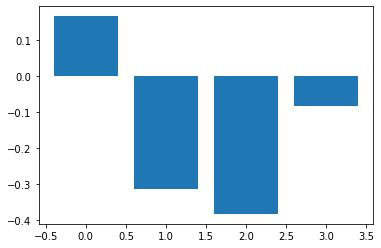

In [44]:
importance = lassoReg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(labels[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
tempDict = dict()

for i in names1:
    tempDict[i] = 0


for i in range(100):
    realRfReg = RandomForestRegressor().fit(x, y)

    predictions = list(realRfReg.predict(x_rookie))

    for i in range(len(predictions)):
         tempDict[names1[i]] = tempDict[names1[i]] + predictions[i]   

new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)
